In [137]:
import gmaps
import gmaps.datasets
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import locations_to_cordinates as lc
import jcz_study_infocollector as infocollector

In [52]:
#Insert API key
gmaps.configure(api_key='')

In [138]:
df_cases = pd.read_csv("studyDataSet/study_filtered.csv")
df_1 = df_cases[['Owner','Ow_Location']]
df_cases.dropna(subset=['Ow_Location'], inplace= True)

dic = {}
weights = []
locations = []
for row in df_cases.itertuples():
    if row[4] in lc.places_to_cord:
        
        if not row[4] in dic:
            dic[row[4]] = 0
            locations.append((lc.places_to_cord[row[4]][0],lc.places_to_cord[row[4]][1]))
        else:
            dic[row[4]] += 1
        
    else:
        print("key missing")
weights = list(dic.values())

#df_1


In [139]:
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig.add_layer(gmaps.marker_layer(locations))
fig

Figure(layout=FigureLayout(height='420px'))

In [140]:
user_list = ["135978929", "127005461", '209780362', '1156013664681353217']

user_text = infocollector.get_users_tweets_text(user_list)
#print(user_text)

In [76]:
str_text = ""
for i in user_text:
    str_text += " " + i.decode('utf-8')

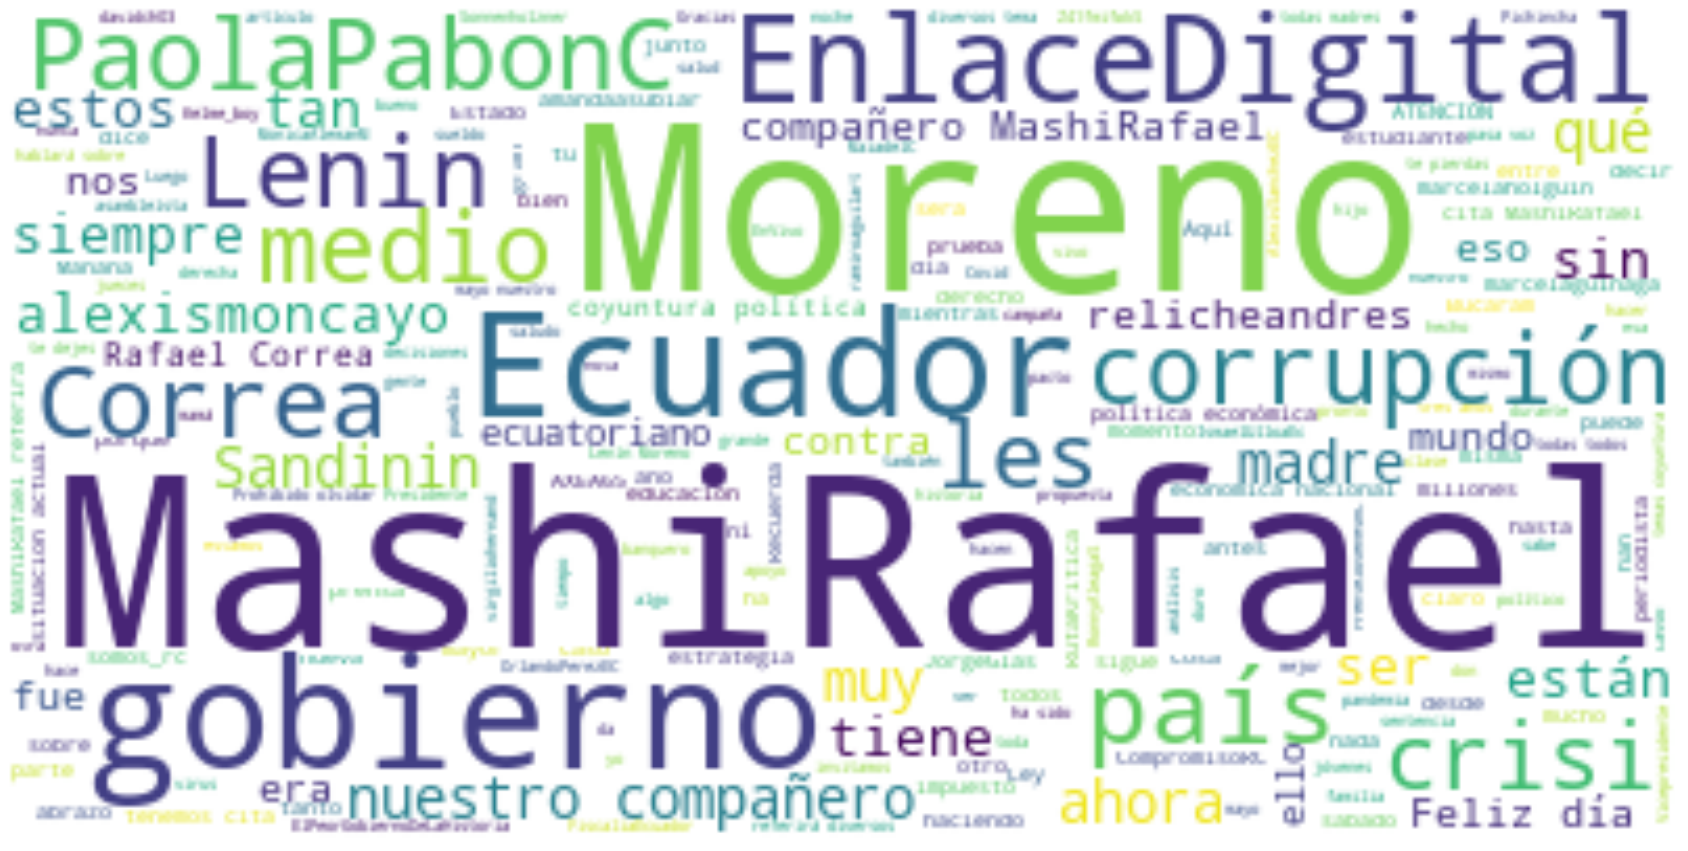

In [98]:
stopwords = set(STOPWORDS)
stopwords.update(["RT", "https", "co", "para", "en", "que", "la", "el", "de", "por", "una", "con", " un", "del", "le", "se", 
                 "un", "se", "todo", "lo", "es", "al", "esta", "este", "mi", "como", "está", "paí", "las", "su", "si", "esto",
                 "ya", "son", "los", "más", "hay", "hoy", "sus", "solo", "pero", "quienes", "cuando", "ante"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str_text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[30,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#wordcloud.to_file("text_analysis/study_cases_timeline.png")

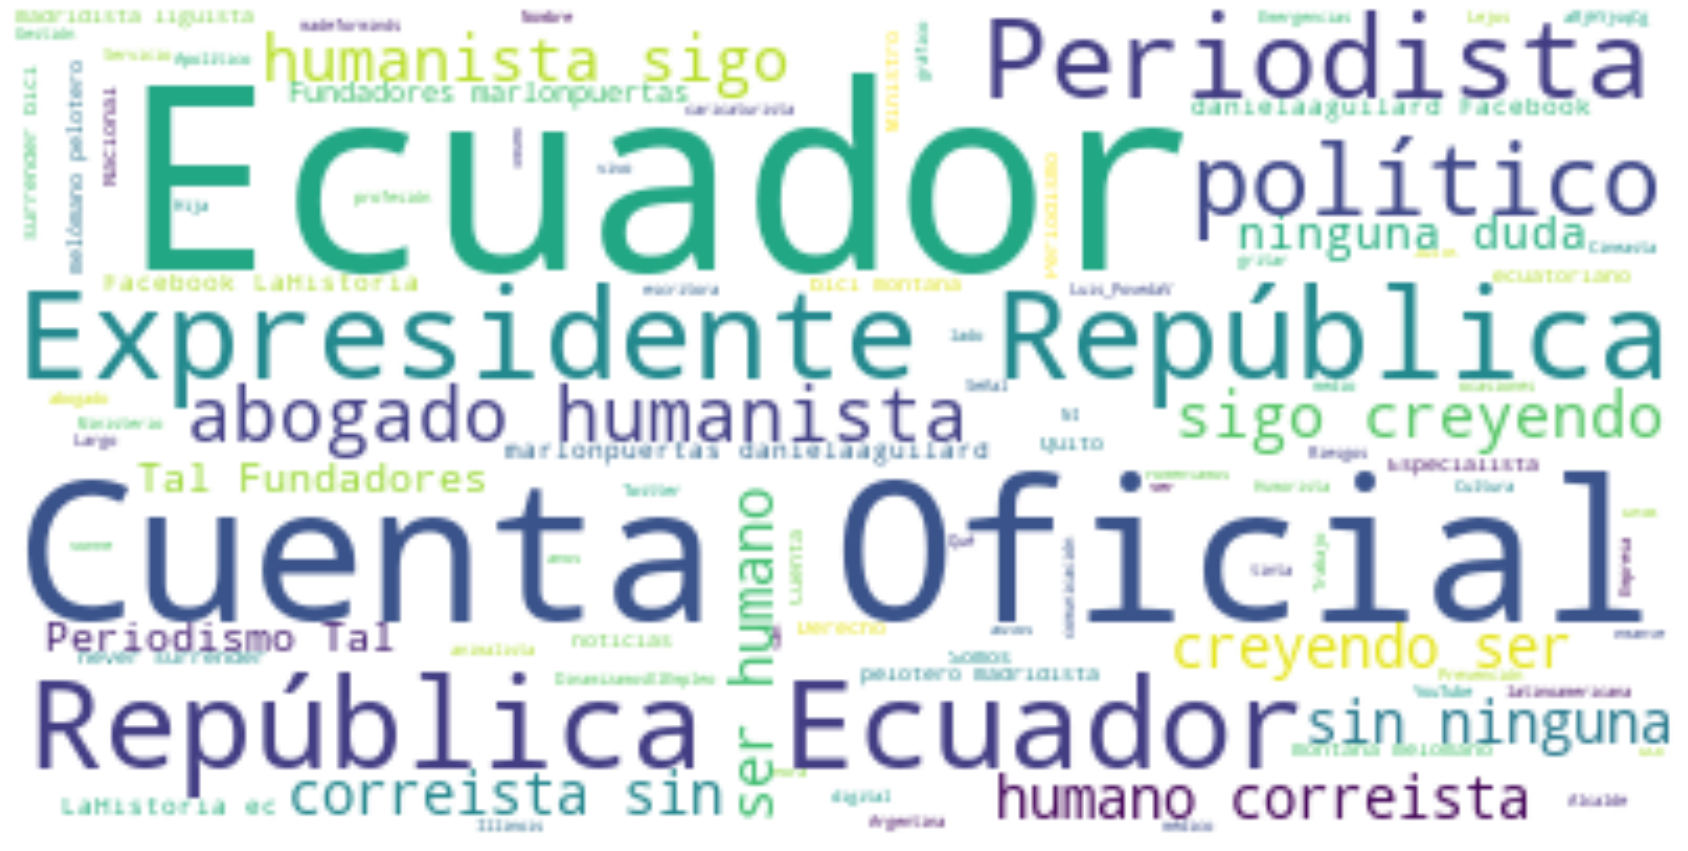

In [136]:
df_words = pd.read_csv("studyDataSet/study_filtered_str.csv")
df_words = df_words[['Tweet_Full','User_desc']]
df_words.dropna(subset=['Tweet_Full','User_desc'], inplace= True)
str_text_tweets = ""
str_des_usr = ""


for row in df_words.itertuples():
    str_text_tweets += row[1] + " "
    str_des_usr += row[2] + " "
    
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str_text_tweets)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[30,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#wordcloud.to_file("./text_analysis/tweets_text.png")

# Generate a word cloud image fro str usr
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str_des_usr)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[30,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#wordcloud.to_file("./text_analysis/usr_description.png")

